# 1/ Import Library

In [199]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [118]:
# Cấu hình hiển thị tối đa
pd.set_option('display.max_columns', None)     # Hiện tất cả cột
pd.set_option('display.width', 1000)           # Chiều rộng dòng
pd.set_option('display.max_colwidth', None)    # Chiều rộng từng cột

# Đọc dữ liệu
student_mat = pd.read_csv('student-mat.csv', sep=';')

df = pd.DataFrame(student_mat)

df.head(20)




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


# Check Null

In [121]:
null_counts = student_mat.isnull().sum()

print("Kiểm tra các giá trị NULL:")

Kiểm tra các giá trị NULL:


# Decribe Data

In [124]:
display(df.describe())

display(df.info())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

None

# 2/ EDA

## Bar char with Matplotlib to prensent number of students with different studying time

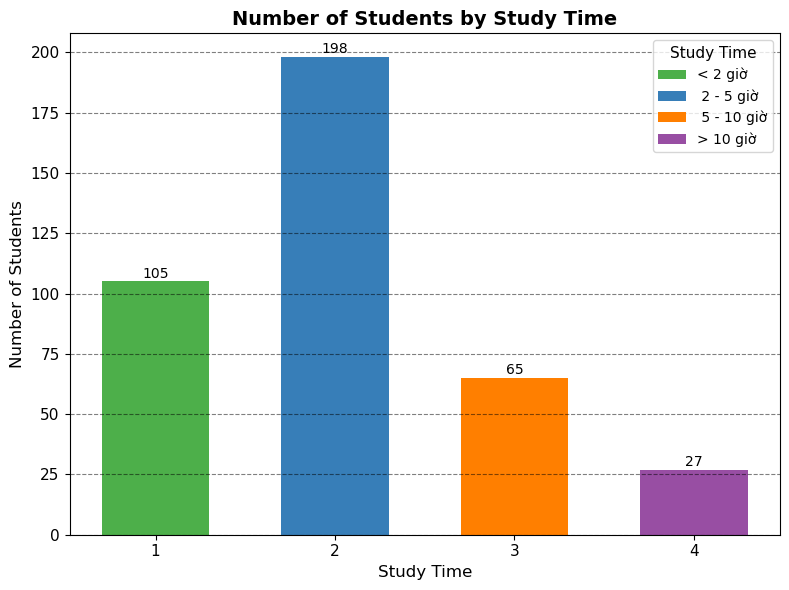

In [128]:
import matplotlib.pyplot as plt
import pandas as pd


student_mat = pd.read_csv('student-mat.csv', sep=';')
df = pd.DataFrame(student_mat)

# Tính số lượng học sinh theo studytime
studytime_counts = df['studytime'].value_counts().sort_index()


# Danh sách màu sắc và label cho từng mức studytime
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']
labels = {
    1: "< 2 giờ",
    2: " 2 - 5 giờ",
    3: " 5 - 10 giờ",
    4: "> 10 giờ"
}

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
bars = plt.bar(
    studytime_counts.index,
    studytime_counts.values,
    color=colors,
    width=0.6,
    label=[labels[i] for i in studytime_counts.index]  # Gán nhãn cho từng cột
)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, int(yval), ha='center', va='bottom', fontsize=10)

# Cài đặt trục và nhãn
plt.xticks(studytime_counts.index, [f"{i}" for i in studytime_counts.index], fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Study Time', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Number of Students by Study Time', fontsize=14, fontweight='bold')

# Thêm đường lưới
plt.grid(axis='y', linestyle='--', alpha=0.5,color='black')

# Thêm legend
plt.legend(title="Study Time", loc="upper right", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()




# Draw Scatter : Studytime and G3

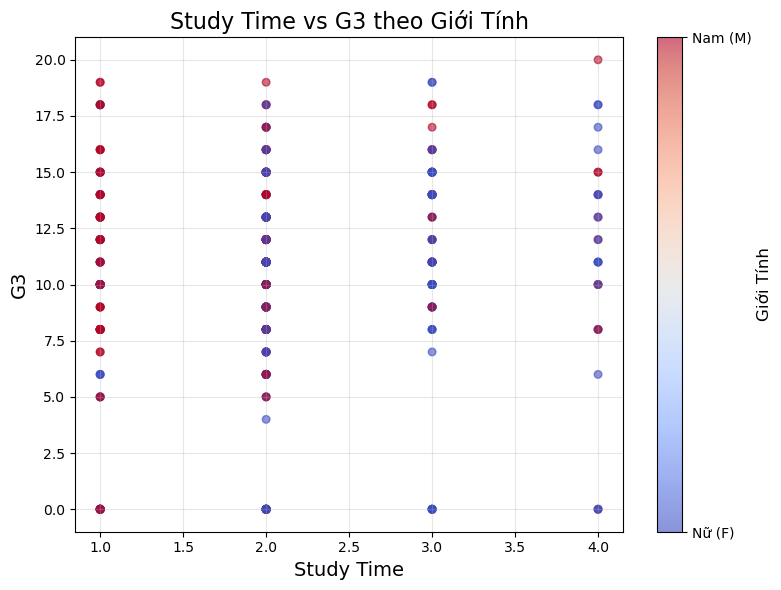

In [132]:



df['sex_num'] = df['sex'].map({'F': 0, 'M': 1})

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 6))

sc = plt.scatter(df['studytime'],
                 df['G3'],
                 c=df['sex_num'],
                 cmap='coolwarm',  # hoặc 'bwr', 'viridis', tùy sở thích
                 alpha=0.6,
                 s=30)

# Ghi nhãn và tiêu đề
plt.xlabel("Study Time", fontsize=14)
plt.ylabel("G3", fontsize=14)
plt.title("Study Time vs G3 theo Giới Tính", fontsize=16)

# Thêm colorbar (dãy màu)
cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.set_label("Giới Tính", fontsize=12)
cbar.set_ticklabels(['Nữ (F)', 'Nam (M)'])

# Cài đặt thêm
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Draw Boxlot to illustrate the relation between G3 and studytime

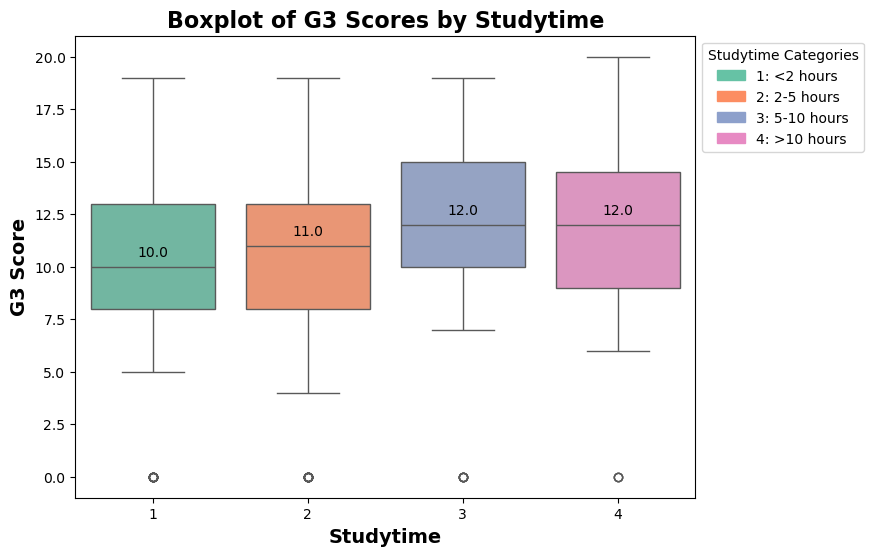

In [134]:


student_mat = pd.read_csv('student-mat.csv', sep=';')


medians = student_mat.groupby('studytime')['G3'].median()

means = student_mat.groupby('studytime')['G3'].mean()


plt.figure(figsize=(8, 6))

sns.boxplot(
    x='studytime',
    y='G3',
    hue='studytime',
    data=student_mat,
    palette='Set2',
    legend=False
)


for i, studytime in enumerate(medians.index):
    median = medians[studytime]
    mean = means[studytime]
    # Thêm trung vị (median) ở vị trí trên hộp
    plt.text(i, median + 0.5, f'{median:.1f}', 
             horizontalalignment='center', fontsize=10, color='black')
 


plt.title('Boxplot of G3 Scores by Studytime', fontsize=16, fontweight='bold')
plt.xlabel('Studytime', fontsize=14,fontweight='bold')
plt.ylabel('G3 Score', fontsize=14,fontweight='bold')


plt.xticks(ticks=range(len(medians)), labels=['1', '2', '3', '4'])


colors = sns.color_palette('Set2', 4)  

plt.legend(handles=[
    mpatches.Patch(color=colors[0], label='1: <2 hours'),
    mpatches.Patch(color=colors[1], label='2: 2-5 hours'),
    mpatches.Patch(color=colors[2], label='3: 5-10 hours'),
    mpatches.Patch(color=colors[3], label='4: >10 hours')
], title='Studytime Categories', loc='upper left', bbox_to_anchor=(1, 1))

# Lưu biểu đồ thành file hình ảnh
plt.show()

# Draw Pairplot to represent the relationship of G1, G2, G3 and studytime

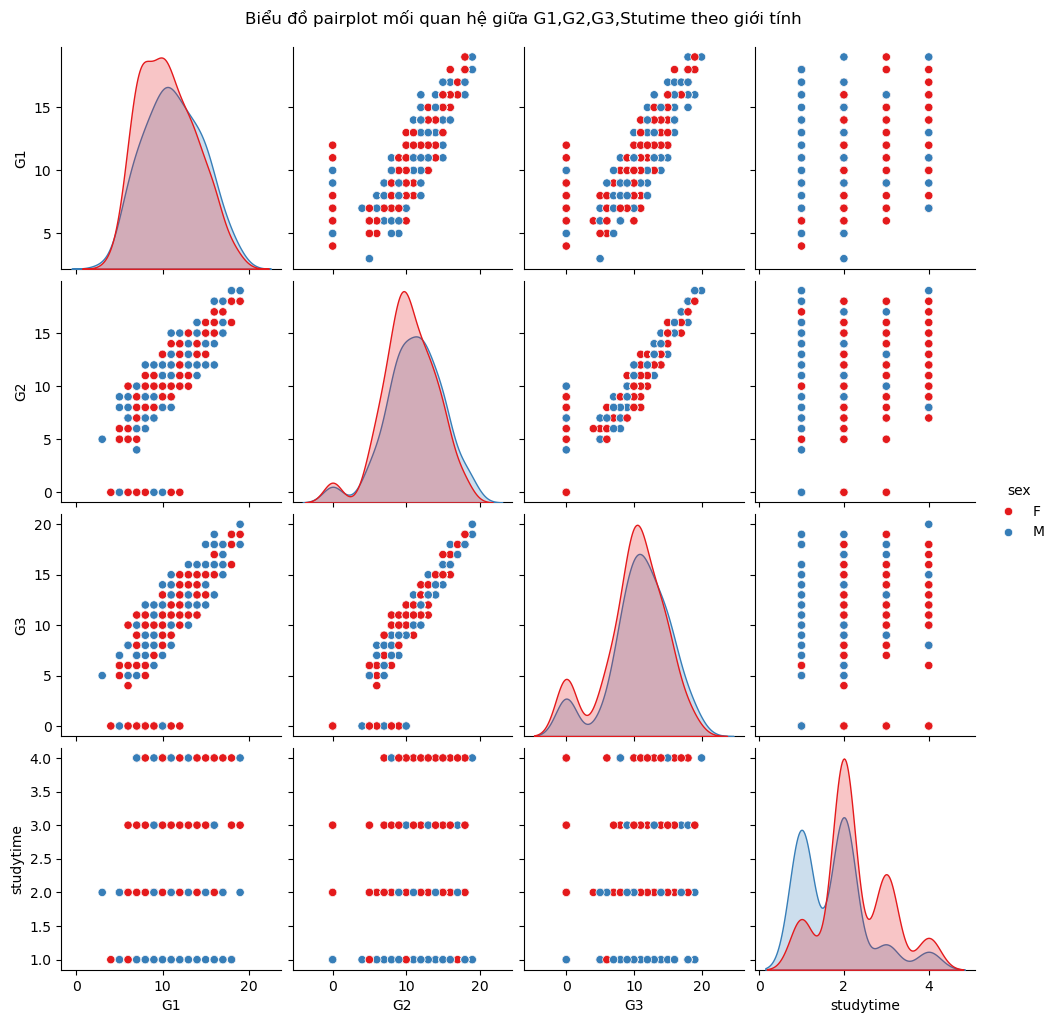

In [138]:
student_mat = pd.read_csv('student-mat.csv', sep=';')


studytime_labels = {
    1: 'low',
    2: 'medium',
    3: 'high',
    4: 'very high'
}
student_mat['studytime_cat'] = student_mat['studytime'].map(studytime_labels)

# Vẽ biểu đồ pairplot
sns.pairplot(student_mat, vars=['G1', 'G2', 'G3', 'studytime'], hue='sex', palette='Set1')
plt.suptitle('Biểu đồ pairplot mối quan hệ giữa G1,G2,G3,Stutime theo giới tính', y=1.02)
plt.show()

# Draw HeatMap

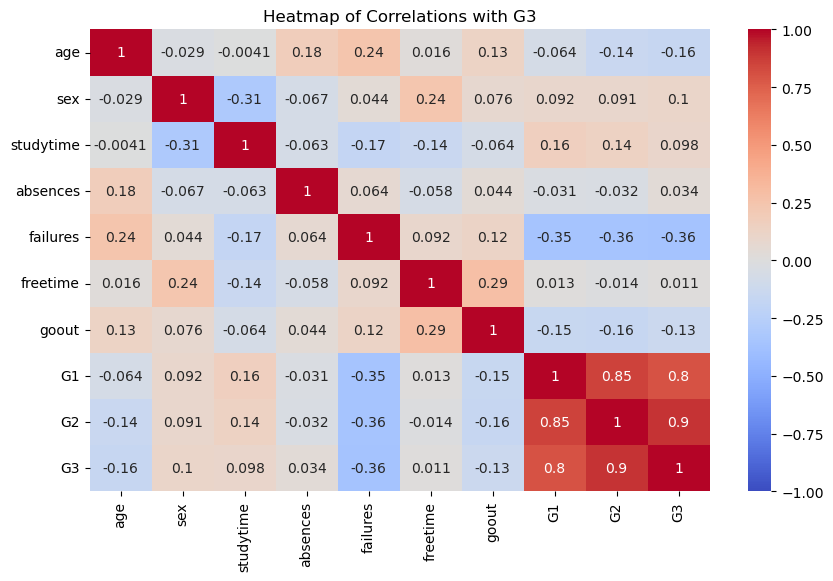

In [159]:
df['sex'] = df['sex'].map({'F': 0, 'M': 1})

# Chọn các cột cần phân tích
columns = ['age', 'sex', 'studytime', 'absences', 'failures', 'freetime', 'goout','G1', 'G2', 'G3']
df_selected = df[columns]

# Tính ma trận tương quan
corr_matrix = df_selected.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Heatmap of Correlations with G3")
plt.show()

# 3/ Statistical Testing with scpicy

# t-test

In [142]:
# Đọc dữ liệu
df = pd.read_csv('student-mat.csv', delimiter=';')
df['absences'] = pd.to_numeric(df['absences'], errors='coerce')
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')

# Phân loại học sinh theo số ngày nghỉ
absences_mean = df['absences'].mean()
df['high_absence'] = df['absences'] > absences_mean

group1 = df[df['high_absence']]['G3'].dropna()
group2 = df[~df['high_absence']]['G3'].dropna()

mean_g3_high_absence = group1.mean()
mean_g3_low_absence = group2.mean()

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

p_value_one_tailed = p_value / 2  # Chia đôi p-value cho kiểm định một phía
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_one_tailed:.4f}")

# Kết luận
alpha = 0.05
if p_value_one_tailed < alpha:
    conclusion = "Bác bỏ H0 — Học sinh nghỉ nhiều có điểm G3 thấp hơn đáng kể."
else:
    conclusion = "Không có đủ bằng chứng để bác bỏ H0 (Học sinh nghỉ nhiều có điểm G3 thấp hơn đáng kể) — Không khác biệt rõ rệt."
print(f"Kết luận (alpha = {alpha}): {conclusion}")


T-statistic: 1.5676, P-value: 0.0589
Kết luận (alpha = 0.05): Không có đủ bằng chứng để bác bỏ H0 (Học sinh nghỉ nhiều có điểm G3 thấp hơn đáng kể) — Không khác biệt rõ rệt.


# z-test

In [144]:
mean_all = df['G3'].mean()
std_all = df['G3'].std()
n_all = len(df)

# Lọc nhóm học sinh có studytime <= 2
group = df[df['studytime'].astype(int) <= 2]['G3']

mean_group = group.mean()
n_group = len(group)

print(n_group)
# Tính standard error (SE)
se = std_all / np.sqrt(n_group)

# Tính Z-statistic
z_stat = (mean_group - mean_all) / se

# Tính p-value cho kiểm định 2 phía (two-tailed test)
p_value = 2 * norm.sf(abs(z_stat))

# In kết quả
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Kết luận
alpha = 0.05  # Mức ý nghĩa

if p_value < alpha:
    print("Kết luận: Bác bỏ H0 — Trung bình điểm G3 của nhóm học ít KHÁC với trung bình toàn bộ.")
else:
    print("Kết luận: Không đủ bằng chứng để bác bỏ H0 — Trung bình điểm G3 của nhóm học ít khác với trung bình toàn bộ.")


303
Z-statistic: -1.088450859818972
P-value: 0.2763961188768098
Kết luận: Không đủ bằng chứng để bác bỏ H0 — Trung bình điểm G3 của nhóm học ít khác với trung bình toàn bộ.


# Chi-square test

In [146]:
df = pd.read_csv('student-mat.csv', sep=';')

# Bước 2: Tạo biến mới nhị phân cho điểm G3
df['G3_level'] = df['G3'].apply(lambda x: 'High' if x >= 12 else 'Low')

# Bước 3: Bảng tần số (bảng chéo)
contingency_table = pd.crosstab(df['studytime'], df['G3_level'])

print("Contingency Table:")
print(contingency_table)

# Bước 4: Thực hiện kiểm định Chi bình phương
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
print(f"\np-value: {p:.4f}")

# Bước 5: Kết luận thống kê
alpha = 0.05
if p < alpha:
    print("Kết luận: Có mối liên hệ có ý nghĩa thống kê giữa thời gian học và điểm số cuối kỳ (G3 High/Low).")
else:
    print("Kết luận: Không có đủ bằng chứng thống kê để khẳng định thời gian học ảnh hưởng đến điểm G3.")

Contingency Table:
G3_level   High  Low
studytime           
1            44   61
2            71  127
3            33   32
4            14   13

Chi-square statistic: 6.0775
Degrees of freedom: 3
Expected frequencies:
G3_level        High         Low
studytime                       
1          43.063291   61.936709
2          81.205063  116.794937
3          26.658228   38.341772
4          11.073418   15.926582

p-value: 0.1079
Kết luận: Không có đủ bằng chứng thống kê để khẳng định thời gian học ảnh hưởng đến điểm G3.


# Proposing measures to improve outcomes of the learning result of students base on data

## It is observed from different maps that studytime and sex are not major factors affecting the outcome (G3). Thus, we need to improve the quality of study time rather than simply increasing the number of learning hours.

## Furthermore, according to the heatmap, we can see that the relationship between G1, G2, and G3 is strong, which indicates that students who achieve excellent results in advance tend to obtain high G3 scores. Therefore, by focusing on students with lower G1 and G2 scores, we can improve the outcomes for these pupils.

# Applying Linear Regression to predict G3

# Processing Data

In [179]:
tf = df[['studytime', 'G1', 'G2','G3']].copy()

tf.head()


,studytime,G1,G2,G3
0,2,5,6,6
1,2,5,5,6
2,2,7,8,10
3,3,15,14,15
4,2,6,10,10


In [203]:
X = tf[['studytime', 'G1', 'G2']]
Y = tf['G3']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [209]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

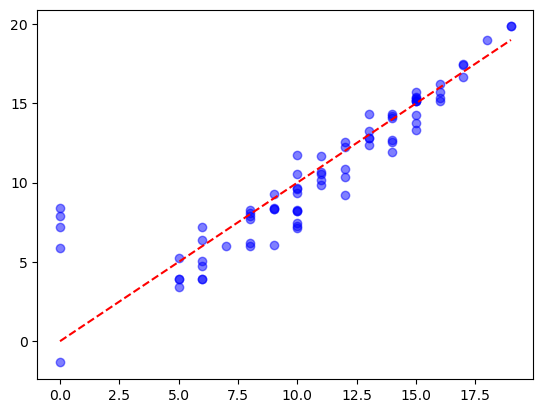

In [225]:


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
